In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

Check the number of images in the dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pathlib
import shutil

In [ ]:
main_dir = '/content/drive/MyDrive/own_dataset'

In [ ]:
# class_names = os.listdir(main_dir)
class_names = os.listdir(valid_dir)
class_names

['Jackfruit', 'Guava', 'Alien', 'Rose', 'Potato', 'Lychee']

In [ ]:
for cname in class_names:
  pathlib.Path('drive/MyDrive/local_leaves/train/'+cname).mkdir(parents=True, exist_ok=True)
  pathlib.Path('drive/MyDrive/local_leaves/valid/'+cname).mkdir(parents=True, exist_ok=True)

In [ ]:
train_dir = 'drive/MyDrive/local_leaves/train/'
valid_dir = 'drive/MyDrive/local_leaves/valid/'

In [ ]:
np.random.seed(42)
def split_train_valid(source_dir, dst_dir,  train_split=0.8):
  class_names = os.listdir(source_dir)
  for class_name in class_names:
    filenames = os.listdir(source_dir+'/'+class_name)
    np.random.shuffle(filenames)
    train_set_number = np.ceil(len(os.listdir(source_dir+'/'+class_name))*train_split)
    for i, filename in enumerate(filenames):
      if i<train_set_number:
        shutil.move(source_dir+'/'+class_name+'/'+filename, dst_dir+'/train/'+class_name+'/'+filename)
      else:
        shutil.move(source_dir+'/'+class_name+'/'+filename, dst_dir+'/valid/'+class_name+'/'+filename)

In [ ]:
for cname in class_names:
  split_train_valid(main_dir, 'drive/MyDrive/local_leaves')

In [ ]:
len(os.listdir(train_dir+'/Lychee'))

88

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=40,
                                   height_shift_range=0.2, width_shift_range=0.2,
                                   shear_range=0.2, fill_mode='nearest')

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1.0/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                                    class_mode='categorical', batch_size=32)
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(224,224),
                                                    class_mode='categorical', batch_size=32)

Found 528 images belonging to 6 classes.
Found 132 images belonging to 6 classes.


In [ ]:
indices = train_generator.class_indices
indices ={values : keys for keys,values in indices.items()}
indices

{0: 'Alien', 1: 'Guava', 2: 'Jackfruit', 3: 'Lychee', 4: 'Potato', 5: 'Rose'}

In [ ]:
from keras.optimizers import Adam

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output

In [ ]:
output = keras.layers.Dense(units=6, activation='softmax')(x)

In [ ]:
mobile_model = keras.Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in mobile_model.layers[:-23]:
    layer.trainable = False

In [ ]:
mobile_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mobile_history = mobile_model.fit_generator(train_generator, steps_per_epoch=17, epochs=20, verbose=2, validation_data=valid_generator,
                              validation_steps=5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
17/17 - 458s - loss: 0.8321 - accuracy: 0.7197 - val_loss: 1.8061 - val_accuracy: 0.4924
Epoch 2/20
17/17 - 26s - loss: 0.0545 - accuracy: 0.9943 - val_loss: 1.9643 - val_accuracy: 0.5303
Epoch 3/20
17/17 - 26s - loss: 0.0307 - accuracy: 0.9962 - val_loss: 1.3006 - val_accuracy: 0.6288
Epoch 4/20
17/17 - 26s - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.7555 - val_accuracy: 0.7348
Epoch 5/20
17/17 - 26s - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.4122 - val_accuracy: 0.8182
Epoch 6/20
17/17 - 26s - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9167
Epoch 7/20
17/17 - 26s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9394
Epoch 8/20
17/17 - 26s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9621
Epoch 9/20
17/17 - 26s - loss: 0.0106 - accuracy: 0.9981 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 10/20
17/17 - 26s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9924
Epoch 11

In [ ]:
mobile_model.save('drive/MyDrive/local_leaves/models/mobilenet_model_6_classes.h5')

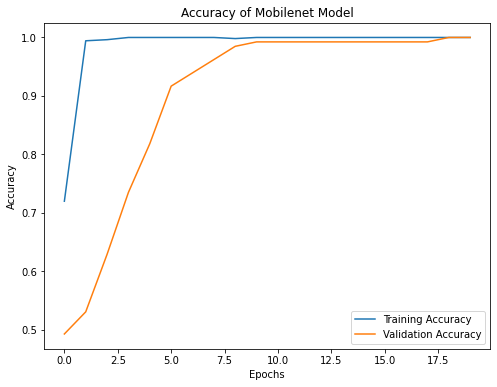

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mobile_history.history['accuracy'], label='Training Accuracy')
ax.plot(mobile_history.history['val_accuracy'], label='Validation Accuracy')
ax.set(xlabel='Epochs', ylabel='Accuracy', title='Accuracy of Mobilenet Model')
ax.legend();

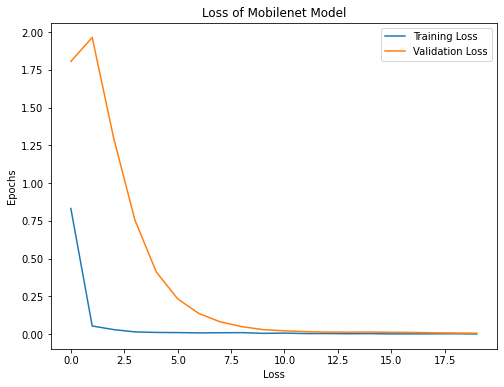

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(mobile_history.history['loss'], label='Training Loss')
ax.plot(mobile_history.history['val_loss'], label='Validation Loss')
ax.set(xlabel='Loss', ylabel='Epochs', title='Loss of Mobilenet Model')
ax.legend();